# Rolling Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
factors = pdr.get_data_famafrench('F-F_Research_Data_Factors', start='1-1-1926')[0]
industries = pdr.get_data_famafrench('10_Industry_Portfolios', start='1-1-1926')[0]

In [8]:
endog = industries.HiTec - factors.RF.values
exog = sm.add_constant(factors['Mkt-RF'])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
params = rres.params
print(params.head())
print(params.tail())


         const  Mkt-RF
Date                  
1926-07    NaN     NaN
1926-08    NaN     NaN
1926-09    NaN     NaN
1926-10    NaN     NaN
1926-11    NaN     NaN
            const    Mkt-RF
Date                       
2021-02  0.723740  1.018344
2021-03  0.671745  1.011283
2021-04  0.779092  1.011212
2021-05  0.704137  1.012206
2021-06  0.802644  1.012720


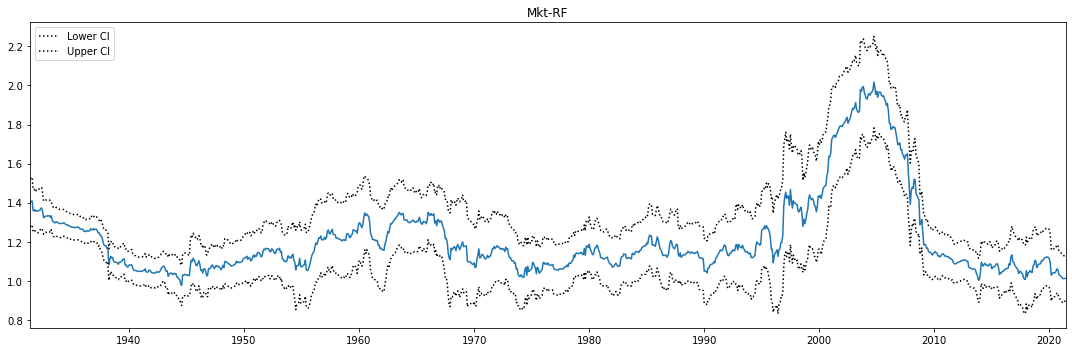

In [11]:
rres.plot_recursive_coefficient(variables=['Mkt-RF'], figsize=(15, 5));

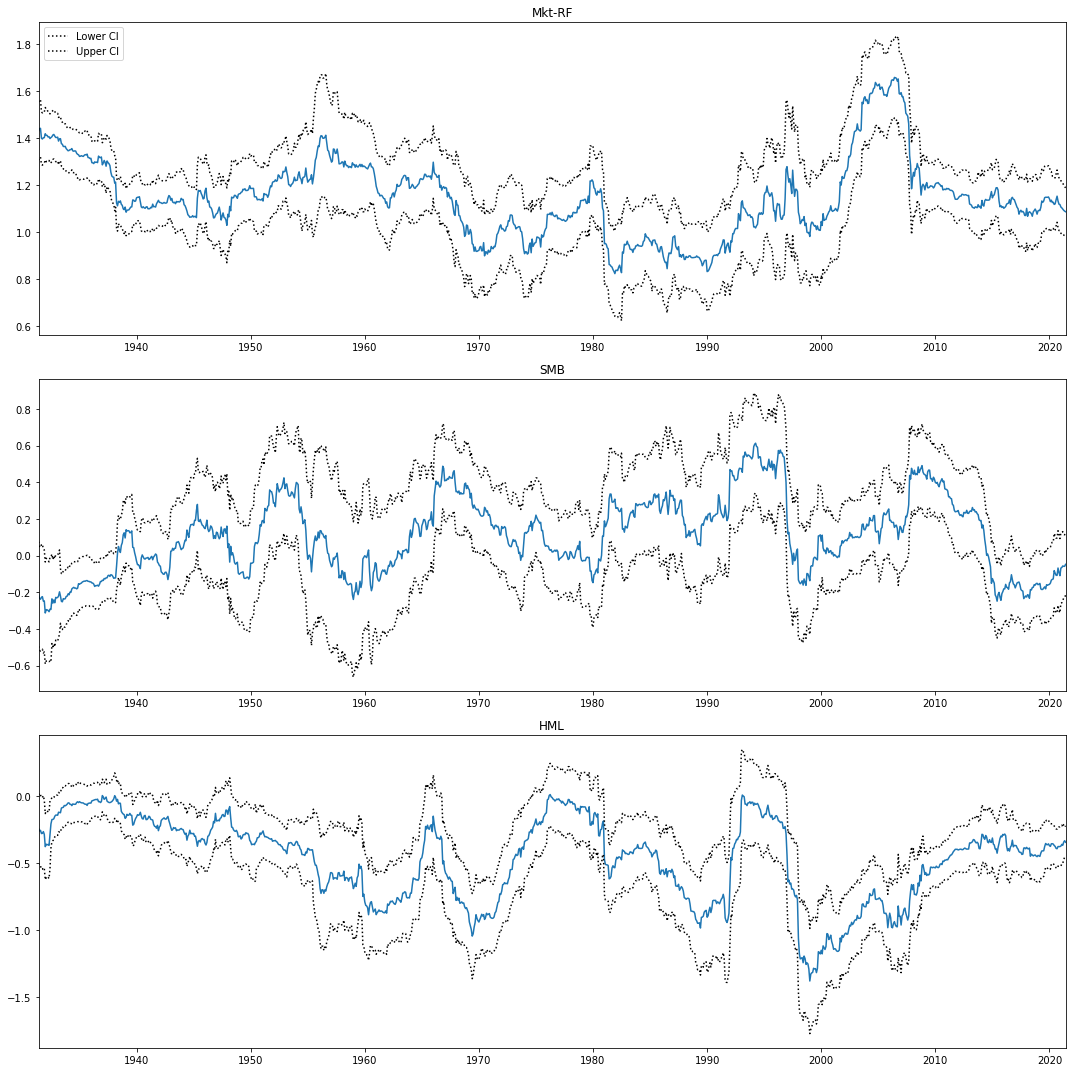

In [12]:
exog_vars = ['Mkt-RF', 'SMB', 'HML']
exog = sm.add_constant(factors[exog_vars])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
rres.plot_recursive_coefficient(variables=exog_vars, figsize=(15,15));